In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
file_path = 'C:/Users/Bhargavi/Desktop/PYTHON RESOURCES/DATA ANALYSIS PROJECT 1/Random sales/Sales-Analysis-main/Regional Sales Dataset.xlsx'

df = pd.read_excel('C:/Users/Bhargavi/Desktop/PYTHON RESOURCES/DATA ANALYSIS PROJECT 1/Random sales/Sales-Analysis-main/Regional Sales Dataset.xlsx')

sheets = pd.read_excel('C:/Users/Bhargavi/Desktop/PYTHON RESOURCES/DATA ANALYSIS PROJECT 1/Random sales/Sales-Analysis-main/Regional Sales Dataset.xlsx', sheet_name=None)

In [94]:
# Data Profiling

df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2021-2024 Budgets']

In [95]:
print(f"df_sales      shape: {df_sales.shape}")
print(f"df_customers  shape: {df_customers.shape}")
print(f"df_products   shape: {df_products.shape}")
print(f"df_regions    shape: {df_regions.shape}")
print(f"df_state_reg  shape: {df_state_reg.shape}")
print(f"df_budgets    shape: {df_budgets.shape}")

df_sales      shape: (64104, 12)
df_customers  shape: (175, 2)
df_products   shape: (30, 2)
df_regions    shape: (994, 15)
df_state_reg  shape: (48, 3)
df_budgets    shape: (30, 2)


In [96]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [97]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [98]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [99]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [100]:
df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [101]:
df_budgets.head()

,Product Name,2021-2024 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [102]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [103]:
# Merging sheets

# Merging with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

# Merging with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# Merging with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

# Merging with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# Merging with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

# Removing redundant columns
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2021-2024 Budgets
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [104]:
# Converting to lower case for ease and consistancy
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2021-2024 budgets'], dtype=object)

In [105]:
# Removing repetitive columns

cols_to_keep = [
    'ordernumber',       
    'orderdate',         
    'customer names',     
    'channel',           
    'product name',       
    'order quantity',     
    'unit price',         
    'line total',         
    'total unit cost',    
    'state_code',         
    'state',              
    'region',            
    'latitude',           
    'longitude',         
    '2021-2024 budgets'        
]

In [106]:
df = df[cols_to_keep]

In [107]:
# Renaming for ease and consistancy

df = df.rename(columns={
    'ordernumber'      : 'order_number',   
    'orderdate'        : 'order_date',     
    'customer names'   : 'customer_name',  
    'product name'     : 'product_name',   
    'order quantity'   : 'quantity',       
    'unit price'       : 'unit_price',    
    'line total'       : 'revenue',        
    'total unit cost'  : 'cost',          
    'state_code'       : 'state',          
    'state'            : 'state_name',    
    'region'           : 'us_region',      
    'latitude'         : 'lat',          
    'longitude'        : 'lon',       
    '2021-2024 budgets': 'budget'      
})

In [108]:
df.head(10)

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329
5,SO - 0010394,2021-01-01,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,Minnesota,Midwest,44.91330,-93.50329,1135815.758
6,SO - 0008865,2021-01-01,Kare Corp,Wholesale,Product 1,7,2874.3,20120.1,1667.094,MA,Massachusetts,Northeast,42.32385,-71.14200,3016489.209
7,SO - 0009909,2021-01-01,State Ltd,Wholesale,Product 25,10,1045.2,10452.0,679.380,CA,California,West,34.05529,-117.75228,5342315.484
8,SO - 0001912,2021-01-01,Lazzy Group,Wholesale,Product 13,5,3852.5,19262.5,2966.425,UT,Utah,West,40.56217,-111.92966,3720639.645
9,SO - 0002683,2021-01-01,Zooveo Company,Export,Product 14,12,2914.5,34974.0,1311.525,NC,North Carolina,South,36.07613,-79.46830,4028698.409


In [111]:
# Blank out budgets for 2025 orders
df.loc[df['order_date'].dt.year == 2025, 'budget'] = pd.NA

df[['order_date','product_name','revenue','budget']].head(10)

,order_date,product_name,revenue,budget
0,2021-01-01,Product 27,14994.6,964940.231
1,2021-01-01,Product 20,25868.7,2067108.120
2,2021-01-01,Product 26,5869.2,5685138.270
3,2021-01-01,Product 7,16368.1,889737.555
4,2021-01-01,Product 8,18331.2,1085037.329
5,2021-01-01,Product 23,57412.3,1135815.758
6,2021-01-01,Product 1,20120.1,3016489.209
7,2021-01-01,Product 25,10452.0,5342315.484
8,2021-01-01,Product 13,19262.5,3720639.645
9,2021-01-01,Product 14,34974.0,4028698.409


In [112]:
# Building dataframes for unit economics

# Total Cost
df['total_cost'] = df['quantity'] * df['cost']

# Profit
df['profit'] = df['revenue'] - df['total_cost']

# Profit Margin Percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Extract month name
df['order_month_name'] = df['order_date'].dt.month_name()

# Extract month number
df['order_month_num'] = df['order_date'].dt.month

df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2025-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2025-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2025-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2025-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


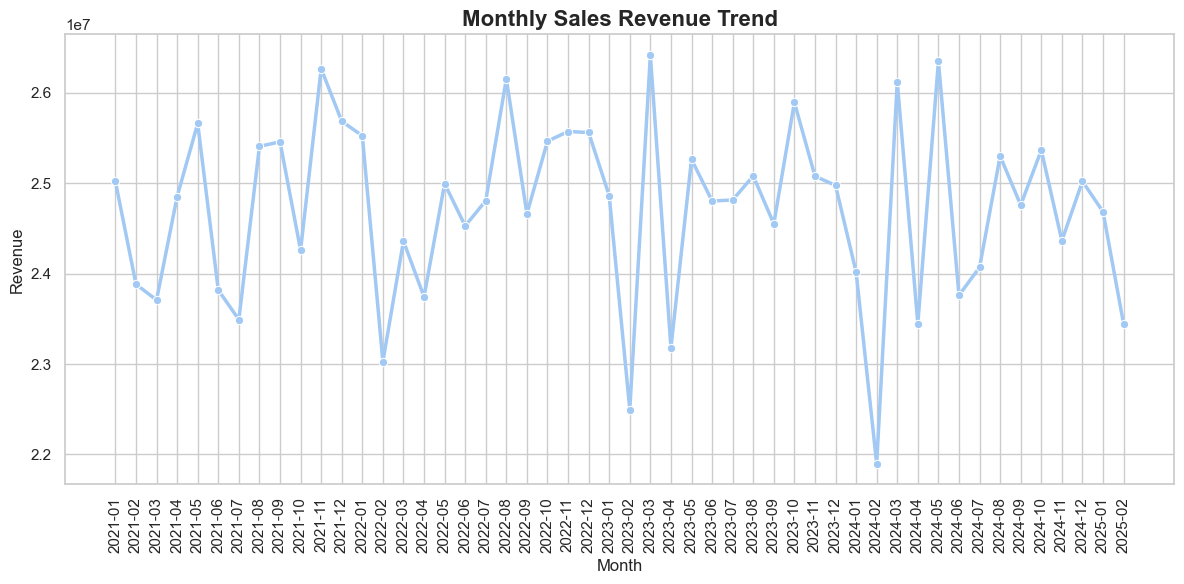

In [124]:
# Exploratory Data Analysis

# Aggregate Monthly Revenue
df['order_date'] = pd.to_datetime(df['order_date'])
df['month_year'] = df['order_date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('month_year')['revenue'].sum().reset_index()
monthly_sales['month_year'] = monthly_sales['month_year']

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month_year', y='revenue', marker='o', linewidth=2.5)
sns.set(style='whitegrid', palette='pastel')
plt.title('Monthly Sales Revenue Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

plt.show()

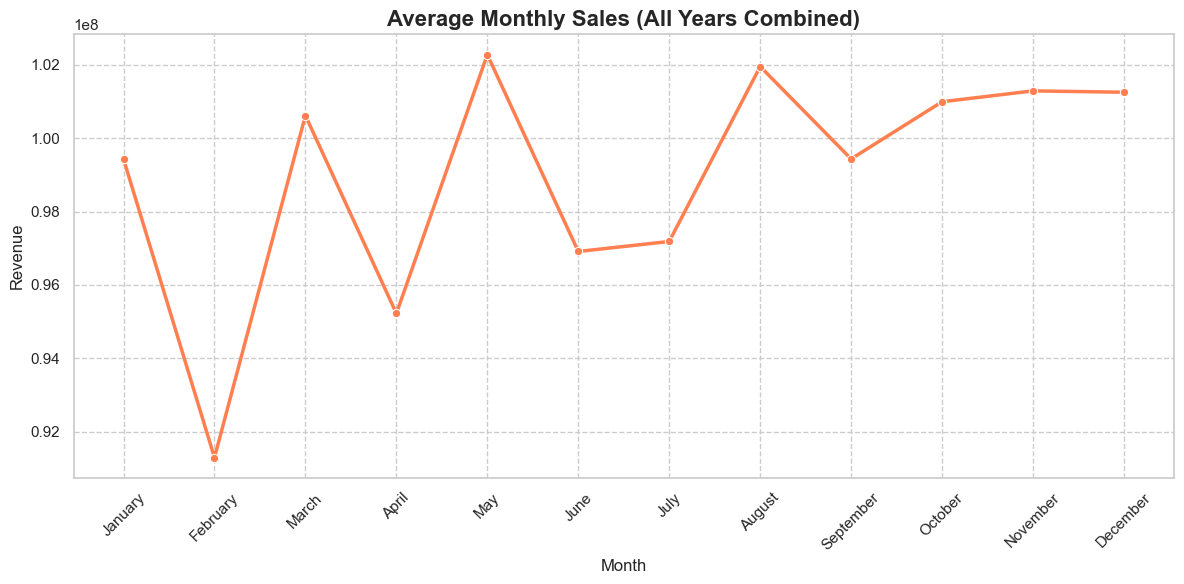

In [123]:
# Monthly Sales Trend (All Years Combined)

df_ = df[df['order_date'].dt.year != 2025]

monthly_sales = (df_.groupby(['order_month_num', 'order_month_name'])['revenue'].sum().reset_index().sort_values('order_month_num'))

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='order_month_name', y='revenue', marker='o', linewidth=2.5, color='coral')
plt.title('Average Monthly Sales (All Years Combined)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.show()

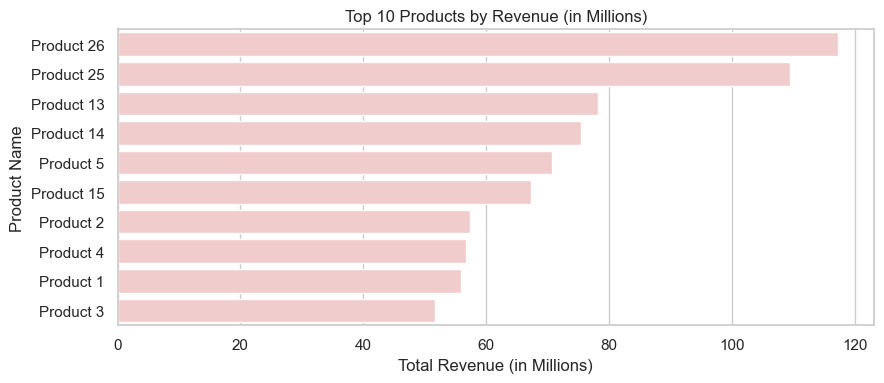

In [127]:
# Top 10 Products by Revenue

top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

top_prod = top_prod.nlargest(10)

plt.figure(figsize=(9, 4))
sns.barplot(x=top_prod.values, y=top_prod.index, color='#f7c6c7')
plt.title('Top 10 Products by Revenue (in Millions)')  
plt.xlabel('Total Revenue (in Millions)')              
plt.ylabel('Product Name')                             
plt.tight_layout()

plt.show()

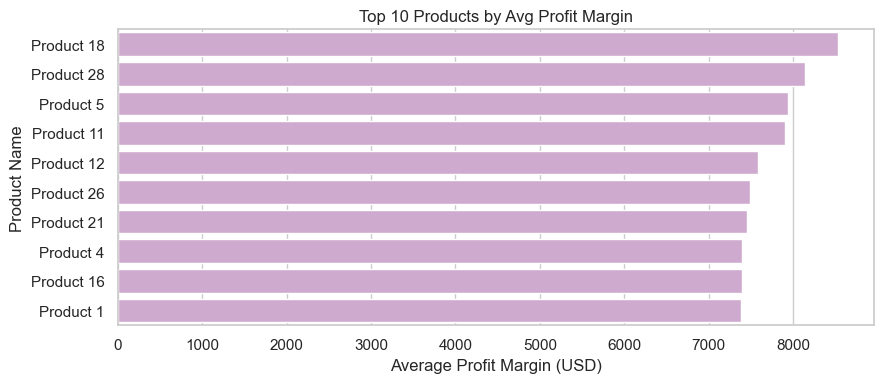

In [130]:
# Top 10 Products by Average Profit Margin

top_margin = (df.groupby('product_name')['profit'].mean().sort_values(ascending=False).head(10))

plt.figure(figsize=(9, 4))
sns.barplot(x=top_margin.values, y=top_margin.index, color='#d4a5d4')
plt.title('Top 10 Products by Avg Profit Margin')  
plt.xlabel('Average Profit Margin (USD)')          
plt.ylabel('Product Name')                         
plt.tight_layout()

plt.show()

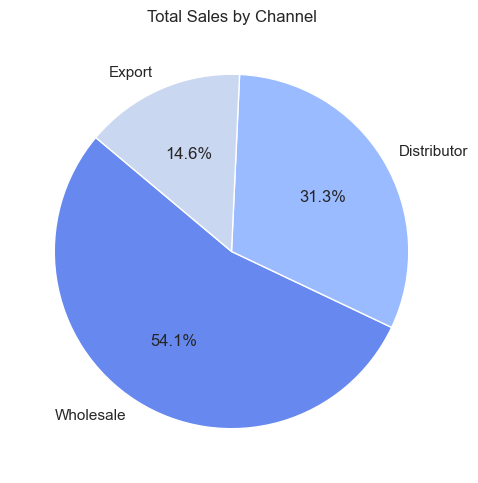

In [141]:
# Sales by channel

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 5))
plt.pie(chan_sales.values, labels=chan_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
plt.title('Total Sales by Channel')
plt.tight_layout()

plt.show()

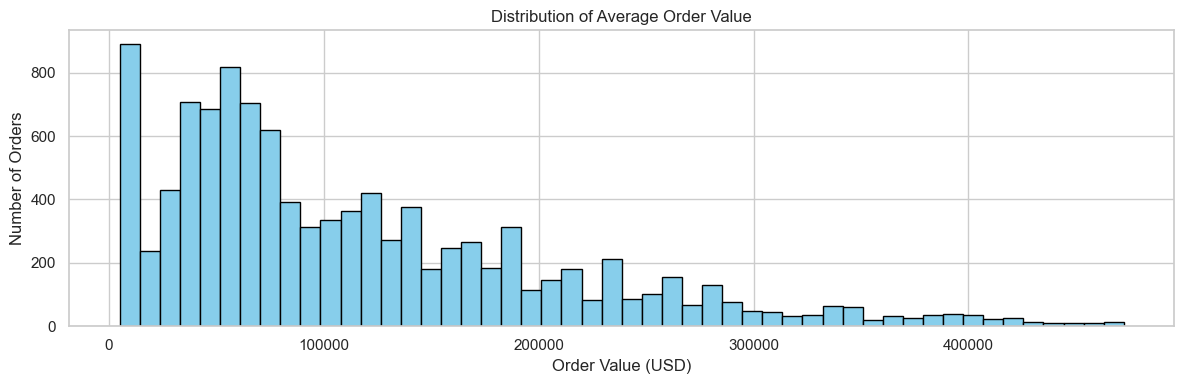

In [142]:
# Average Order Value Distribution

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12, 4))
plt.hist(aov, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')
plt.tight_layout()

plt.show()

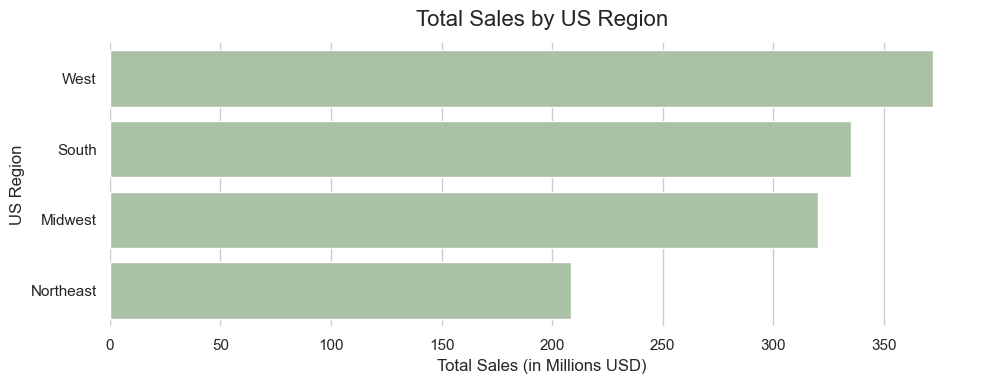

In [147]:
# Total Sales by US Region

region_sales = (df.groupby('us_region')['revenue'].sum().sort_values(ascending=False)/1e6)

plt.figure(figsize=(10, 4))
sns.barplot(x=region_sales.values, y=region_sales.index, color='#a8c5a1')
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

C:\Users\Bhargavi\AppData\Local\Temp\ipykernel_12488\2833803264.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rev.values / 1e6, y=top_rev.index, palette='Blues_r', ax=axes[0])
C:\Users\Bhargavi\AppData\Local\Temp\ipykernel_12488\2833803264.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_rev.values / 1e6, y=bottom_rev.index, palette='Reds', ax=axes[1])


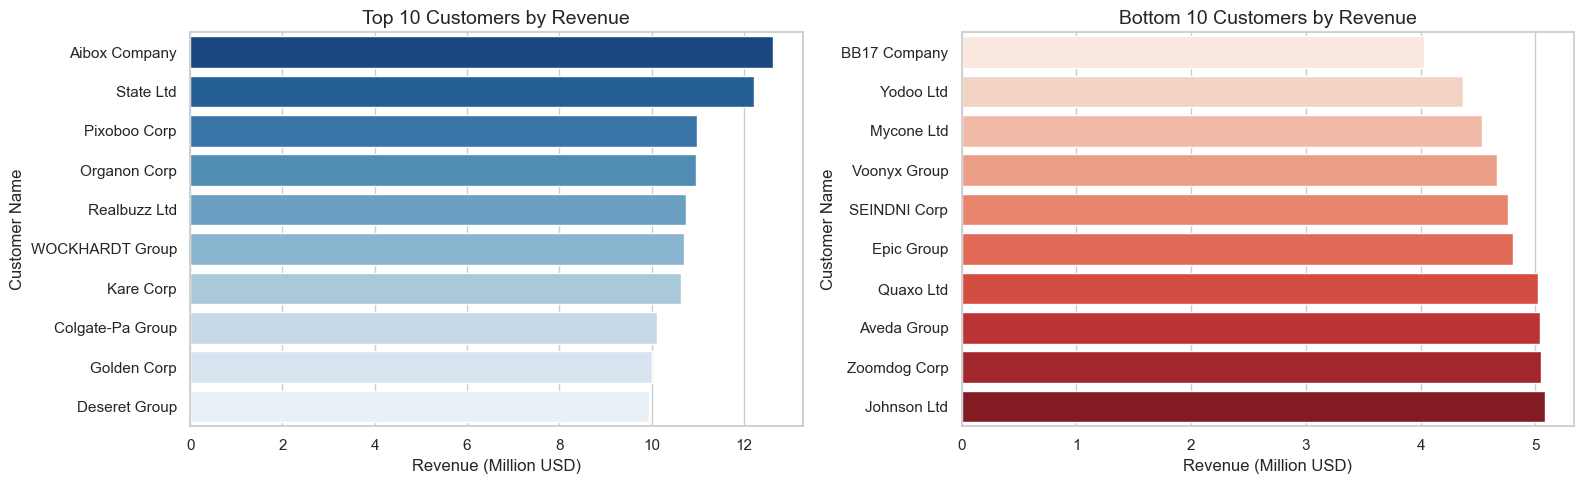

In [149]:
# Top 10 States by Revenue and Order Count

top_rev = (df.groupby('customer_name')['revenue'].sum().sort_values(ascending=False).head(10))
bottom_rev = (df.groupby('customer_name')['revenue'].sum().sort_values(ascending=True).head(10))

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1
sns.barplot(x=top_rev.values / 1e6, y=top_rev.index, palette='Blues_r', ax=axes[0])
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)      
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              
axes[0].set_ylabel('Customer Name', fontsize=12)                  

# Plot 2
sns.barplot(x=bottom_rev.values / 1e6, y=bottom_rev.index, palette='Reds', ax=axes[1])
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)     
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              
axes[1].set_ylabel('Customer Name', fontsize=12)      

plt.tight_layout()
plt.show()

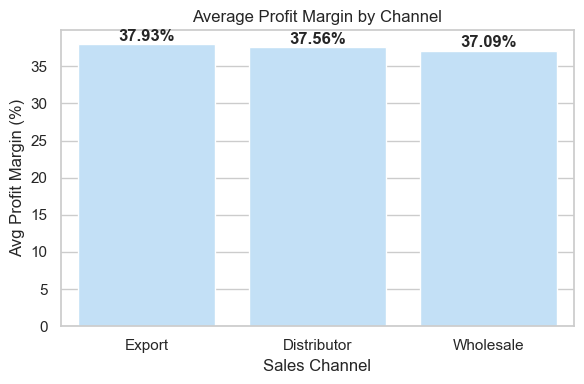

In [166]:
# Average Profit Margin by Channel

channel_margin = (df.groupby('channel')['profit_margin_pct'].mean().sort_values(ascending=False))

plt.figure(figsize=(6, 4))

ax = sns.barplot(x=channel_margin.index, y=channel_margin.values, color ='#BAE1FF')
plt.title('Average Profit Margin by Channel')  
plt.xlabel('Sales Channel')                    
plt.ylabel('Avg Profit Margin (%)')            

# Annotating each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

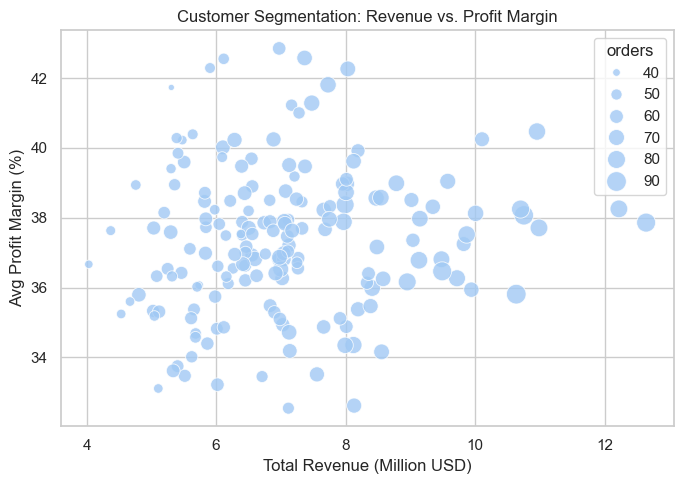

In [170]:
# Customer Segmentation: Revenue vs. Profit Margin

cust_summary = df.groupby('customer_name').agg(total_revenue=('revenue', 'sum'), total_profit=('profit', 'sum'),
               avg_margin=('profit_margin_pct', 'mean'), orders=('order_number', 'nunique'))

# Converting revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))
sns.scatterplot(data=cust_summary, x='total_revenue_m', y='avg_margin', size='orders', sizes=(20, 200), alpha=0.8)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()